# **Goal and a short plan for the upcoming analysis.**



**Goal:**

The goal of this analysis is to investigate the relationship between various factors and the timely repayment of loans by bank customers. We aim to answer several research questions:

* Is there a relationship between having children and repaying the loan on time?
* Is there a relationship between marital status and repayment of the loan on time?
Is there a relationship between income level and loan repayment on time?
How do different purposes of a loan affect its repayment on time?

**Short Plan:**

* Data Overview:
Assess the quality of the data and determine the impact of any identified errors on the study.
* Data Preprocessing:
Perform necessary data cleaning and preprocessing steps to address critical data errors. Handle missing values, duplicates, and outliers as required.

* Answers to Research Questions:
Conduct statistical analysis to examine the relationship between having children and loan repayment time. Explore the association between different factors such as marital staus and soon.

* General Conclusion:
Summarize the findings from the analysis, including the relationships observed between the variables of interest and loan repayment and provide recommendations for the customer

By following this structured approach, we will analyze the data, address any data errors, and answer the research questions. The aim is to aid the customer in the development of an effective credit scoring model.

# **Step 1. A brief overview of the data is set correctly and the file is displayed correctly**

**1.1.	Import the pandas library. Read data from a csv file into a dataframe**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")


**1.2.	Print the first 10 lines of the dataframe**

In [52]:
# Display the first 10 rows of the dataset
print(data.head(10))

   children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   
5         0    -926.185831         27    высшее             0   
6         0   -2879.202052         43    высшее             0   
7         0    -152.779569         50   СРЕДНЕЕ             1   
8         2   -6929.865299         35    ВЫСШЕЕ             0   
9         0   -2188.756445         41   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0    

**1.3. Output basic information about the dataframe using the info() method.**

In [53]:
#displaying basic information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# **Step 2. Data Preprocessing**

**2.1. Print the number of missing values for each column.**

In [3]:
# Print the number of missing values ​​for each
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Two columns have missing values. The missing column, total_income, stores income data. The amount of income is most influenced by the type of employment, so you need to fill in the gaps in this column with the median value for each type from the income_type column.

**2.2. Fill in the column with the missing values**

In [4]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

**Handling anomalous values**
Let's handle the gaps in the days_employed column. A negative number of days of work experience is an anomaly. Let's replace all negative values ​with positive ones.

In [5]:
data['days_employed'] = data['days_employed'].abs()

In [6]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) will have abnormally large values. It is difficult to correct such values, so we will leave them as they are. Moreover, this column will not be needed for research.

In [7]:
# Check for abnormal values and outliers
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")

Column: children
Unique Values: [ 1  0  3  2 -1  4 20  5]

Column: days_employed
Unique Values: [8437.67302776 4024.80375385 5623.42261023 ... 2113.3468877  3112.4817052
 1984.50758853]

Column: dob_years
Unique Values: [42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]

Column: education
Unique Values: ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']

Column: education_id
Unique Values: [0 1 2 3 4]

Column: family_status
Unique Values: ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

Column: family_status_id
Unique Values: [0 1 2 3 4]

Column: gender
Unique Values: ['F' 'M' 'XNA']

Column: income_type
Unique Values: ['сотрудник' 'пенсионер' 'компаньон' 

**2.3. Review the columns for abnormal values and outliers. Find out which columns they are in, fix them.**

In [9]:
# Fixing abnormal values and outliers
# Fixing 'days_employed' column
data['days_employed'] = data['days_employed'].abs()  # Converting negative values to positive

# Fixing 'dob_years' column
data.loc[data['dob_years'] == 0, 'dob_years'] = data['dob_years'].median()  # Replacing 0 with median age

# Fixing 'gender' column
data = data[data['gender'] != 'XNA']  # Removing rows with 'XNA' gender

**2.4. For each type of employment, output the median length of service in days from the days_employed column. See if everything is in order. Write the output.**

In [49]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        15266.5
в декрете           3296.0
госслужащий         2689.0
компаньон           1554.0
пенсионер          15218.0
предприниматель      520.0
сотрудник           1573.0
студент              578.0
Name: days_employed, dtype: float64

**2.5. List the unique values of the children column. Delete rows with abnormal values.**

In [10]:
# Let's display a list of unique values ​​for the children column
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [11]:
# Fixing 'children' column
data.loc[data['children'] == -1, 'children'] = 1  # Replacing -1 with 1
data = data[data['children'] < 20]  # Removing rows with children value 20

There are two anomalous values ​​in the children column. Let's remove the rows containing such anomalous values ​​from the data frame.

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [14]:
# checking if the missing values are filled
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**2.6. Fill in the gaps in the days_employed column with the median values for each income_type employment type.**

filling the missing values in the days_employed column with the median values ​​for each income_type employment type.

In [48]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**2.7. Process the implicit duplicates in the education column. This column has the same values, but written in different ways: using uppercase and lowercase letters. Bring them to the lower case.**

In [47]:
# Fixing 'education' column
data['education'] = data['education'].str.lower() # Converting all values to lowercase

**2.8. Display the number of duplicate rows in the data. If such lines are present, delete them. Based on the ranges listed below, create a total_income_category column with categories in the data dataframe:**

In [16]:
data.duplicated().sum()

72

In [17]:
data = data.drop_duplicates() # deleting duplicates

Based on the ranges listed below, we need to create a total_income_category column with categories in the data dataframe:
*	0–30000 — 'E';
*	30001–50000 — 'D';
*	50001–200000 — 'C';
*	200001–1000000 — 'B';
*	1000001 и выше — 'A'.

In [15]:
data['total_income'] = data['total_income'].astype(int) #converting dtypt to int

In [18]:
def income_category(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(income_category)

**2.9. Consider the list of unique purposes of taking out a loan from the purpose column. Assign each row a category based on the content of the text in the column (focus on keywords).**

In [20]:
# displaying the unique purpose for taking out a loan from the purpose column
data['purpose'].unique()


array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Assign each row a category based on the content of the text in the column.
* 'car operations',
* 'real estate transactions',
* 'holding a wedding',
*	'getting an education'.

In [21]:
def purpose_category(row):
    try:
        if 'автом' in row:
            return 'car operations'
        elif 'жил' in row or 'недвиж' in row:
            return 'real estate transactions'
        elif 'свад' in row:
            return 'holding a wedding'
        elif 'образов' in row:
            return 'getting an education'
    except:
        return 'no category'

In [22]:
data['purpose_category'] = data['purpose'].apply(purpose_category)

In [22]:
data.head() # checking the outcome

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


**Research analysis and visualization.**

Answering the question, is there a relationship between the number of children and income level?

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21376 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21376 non-null  int64  
 1   days_employed          21376 non-null  float64
 2   dob_years              21376 non-null  int64  
 3   education              21376 non-null  object 
 4   education_id           21376 non-null  int64  
 5   family_status          21376 non-null  object 
 6   family_status_id       21376 non-null  int64  
 7   gender                 21376 non-null  object 
 8   income_type            21376 non-null  object 
 9   debt                   21376 non-null  int64  
 10  total_income           21376 non-null  int64  
 11  purpose                21376 non-null  object 
 12  total_income_category  21376 non-null  object 
 13  purpose_category       21376 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 2.4+ MB


we need to do some data transformation for the column days_employed as the should be a real number as days of services

In [24]:
data['days_employed'] = data['days_employed'].astype(int) # using the astype method to convert the data to int type
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,real estate transactions
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,car operations
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,real estate transactions
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,getting an education
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,holding a wedding


As we can see days_employed contains abnormal

In [25]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,2.137600e+04
mean,0.475206,67145.125889,43.473849,0.816944,0.974457,0.081072,1.653154e+05
std,0.751975,139274.334834,12.217743,0.549011,1.421836,0.272952,9.826148e+04
min,0.000000,24.000000,19.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1024.000000,33.000000,1.000000,0.000000,0.000000,1.075215e+05
50%,0.000000,1997.000000,42.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,5336.500000,53.000000,1.000000,1.000000,0.000000,1.957885e+05
max,5.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**The outcome:**

**The dob_years column**

The minimum age value in years is 19 and max 75 this looks fine.

**Column days_employed**

We don't have any negative values. The minimum value is 24 days. The maximum value **401755** as length of service is abnormal. Let's assume that this value is in hours, then we get about 16,740 days of experience (which corresponds to approximately 46 years of experience). Considering that the maximum age of the client is 75 years as shown above in the table, I consider the assumption that the anomalous values ​​are given in hours to be correct. Let's convert all anomalous values ​​in the column to values ​​in days. We have the minimum age 19 in the table, but because The minimum age for registration under an employment contract is 16 years (i.e., according to the Russian Federation labor laws), and the maximum age is 75 years. Let’s take the length of service equal to 59 years (rounded we get 21,500 days). We will consider all the values ​​above to be erroneous and divide them by 24 hours, resulting in days.

In [26]:
# Convert abnormal values ​​in the days_employed column to values ​​in days
data.loc[data['days_employed'] > 21500, 'days_employed'] = data.loc[data['days_employed'] > 21500, 'days_employed'] / 24

In [27]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.00,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,real estate transactions
1,1,4024.00,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,car operations
2,0,5623.00,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,real estate transactions
3,3,4124.00,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,getting an education
4,0,14177.75,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,holding a wedding


In [28]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,2.137600e+04
mean,0.475206,4596.672066,43.473849,0.816944,0.974457,0.081072,1.653154e+05
std,0.751975,5350.518025,12.217743,0.549011,1.421836,0.272952,9.826148e+04
min,0.000000,24.000000,19.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1024.000000,33.000000,1.000000,0.000000,0.000000,1.075215e+05
50%,0.000000,1997.000000,42.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,5336.500000,53.000000,1.000000,1.000000,0.000000,1.957885e+05
max,5.000000,18388.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Conclusion:**
So, now we have the maximum value in the days_employed column is 18388 days, that is equal to 50 years of experience and this looks fine.

N.B. Again we got a float number for days_employed columns, this happend because we have used division.So, again we need to convert the value into int dtype.

In [29]:
data['days_employed'] = data['days_employed'].astype(int)

In [30]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,real estate transactions
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,car operations
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,real estate transactions
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,getting an education
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,holding a wedding


**Checking the education column**

In [31]:
data['education'].sort_values().value_counts()

education
среднее                15111
высшее                  5236
неоконченное высшее      741
начальное                282
ученая степень             6
Name: count, dtype: int64

**Conclusion:**The education data looks ok.

# **Step 3. Research analysis and visualization.**

**3.1 Is there a relationship between number of children and income type**

In [32]:
data.children.value_counts()

children
0    14089
1     4855
2     2052
3      330
4       41
5        9
Name: count, dtype: int64

In [33]:
#We will group the data by the number of children and calculate the median income for each group.

income_by_children = data.groupby('children')['total_income'].median().reset_index()
income_by_children.columns = ['Number of Children', 'Median Income']
print(income_by_children)

   Number of Children  Median Income
0                   0       142594.0
1                   1       145521.0
2                   2       142594.0
3                   3       145220.0
4                   4       150447.0
5                   5       168460.0


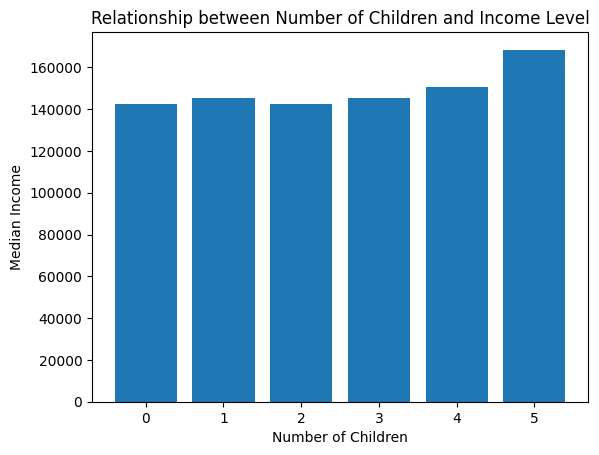

In [34]:
#visualizing the relationship between the number of children and income level using a bar plot.

plt.bar(income_by_children['Number of Children'], income_by_children['Median Income'])
plt.xlabel('Number of Children')
plt.ylabel('Median Income')
plt.title('Relationship between Number of Children and Income Level')
plt.show()

**Conclusions:**

By analyzing the summary table and chart, we can make the following conclusions:
* There is a slight decrease in median income as the number of children
increases.
* The income level tends to be lower for individuals with more children compared to those with fewer or no children.
* This suggests that the number of children has some influence on income levels, although other factors may also contribute.

**3.2 Analyzing the relationship between the number of children and repayment of the loan on time.**

Creating a summary table:

 We will calculate the total number of borrowers, total debtors (those who have defaulted on the loan), and the share of debtors for each category of the number of children.

In [35]:
summary_table = data.groupby('children')['debt'].agg(['count', 'sum'])
summary_table['Debt Share'] = summary_table['sum'] / summary_table['count']
summary_table.columns = ['Total Borrowers', 'Total Debtors', 'Debt Share']
print(summary_table)

          Total Borrowers  Total Debtors  Debt Share
children                                            
0                   14089           1063    0.075449
1                    4855            445    0.091658
2                    2052            194    0.094542
3                     330             27    0.081818
4                      41              4    0.097561
5                       9              0    0.000000


Let's create a function that will display the category of people by the number of children:

* childless if there are no children
* small families if 1 or 2 children
* large families, if 3 or more children

In [38]:
#creating a category for children
def children_category(children):
    if 1 <= children <= 2:
        return 'small families'
    if children >= 3:
        return 'large families'
    return 'childless'

In [50]:
data['family_size_category'] = data['children'].apply(lambda x: 'Childless' if x == 0 else
                                               'Small Family' if x <= 2 else 'Large Family')
debt_share_by_family_size = data.groupby('family_size_category')['debt'].mean().reset_index()
debt_share_by_family_size['debt'] = debt_share_by_family_size['debt'] * 100
debt_share_by_family_size.columns = ['Family Size Category', 'Debt Share (%)']
print(debt_share_by_family_size)

  Family Size Category  Debt Share (%)
0            Childless        7.513429
1         Large Family        8.157895
2         Small Family        9.234104


**Conclusion:**

By analyzing the new summary table, we can make the following conclusions:

Individuals from large families (3 or more children) have the highest debt share, indicating that they are more likely to default on the loan.
Childless individuals have the lowest debt share, suggesting that they have a higher likelihood of repaying the loan on time.
The debt share for small families (1-2 children) falls in between the other two categories.

**3.3 Is there a relationship between marital status and repayment of the loan on time?**

In [51]:
debt_share_by_marital_status = data.groupby('family_status')['debt'].mean().reset_index()
debt_share_by_marital_status['debt'] = debt_share_by_marital_status['debt'] * 100
debt_share_by_marital_status.columns = ['Marital Status', 'Debt Share (%)']
print(debt_share_by_marital_status)

          Marital Status  Debt Share (%)
0  Не женат / не замужем        9.736091
1              в разводе        7.041073
2         вдовец / вдова        6.589958
3       гражданский брак        9.245917
4        женат / замужем        7.525748


**Conclusion:** Based on the results, we can conclude whether there is a relationship between marital status and loan repayment. For example, if borrowers who are single have a higher debt share compared to married borrowers, we can conclude that there might be a relationship.

**Recommendation:** If there is a significant difference in the debt share among different marital statuses, the customer can consider marital status as a factor in assessing loan repayment risk and adjust the risk assessment or lending criteria accordingly.

**3.4.	Is there a relationship between the level of education and the level of income? And accordingly, between the level of education and repayment of the loan on time?**

To analyze the relationship between education level and income, we can calculate the median income for each education level category and examine the relationship. Additionally, we can analyze the debt share for each education level category to see if there is a relationship between education level and loan repayment.

In [45]:
income_by_education = data.groupby('education')['total_income'].median().reset_index()
income_by_education['total_income'] = income_by_education['total_income'] * 100
income_by_education.columns = ['Education Level', 'Median Income (%)']

debt_share_by_education = data.groupby('education')['debt'].mean().reset_index()
debt_share_by_education['debt'] = debt_share_by_education['debt'] * 100
debt_share_by_education.columns = ['Education Level', 'Debt Share (%)']

# Printing the results
print(income_by_education)
print(debt_share_by_education)


       Education Level  Median Income (%)
0               высшее         17148500.0
1            начальное         11894150.0
2  неоконченное высшее         15602500.0
3              среднее         14168400.0
4       ученая степень         15725950.0
       Education Level  Debt Share (%)
0               высшее        5.309396
1            начальное       10.992908
2  неоконченное высшее        9.176788
3              среднее        8.973595
4       ученая степень        0.000000


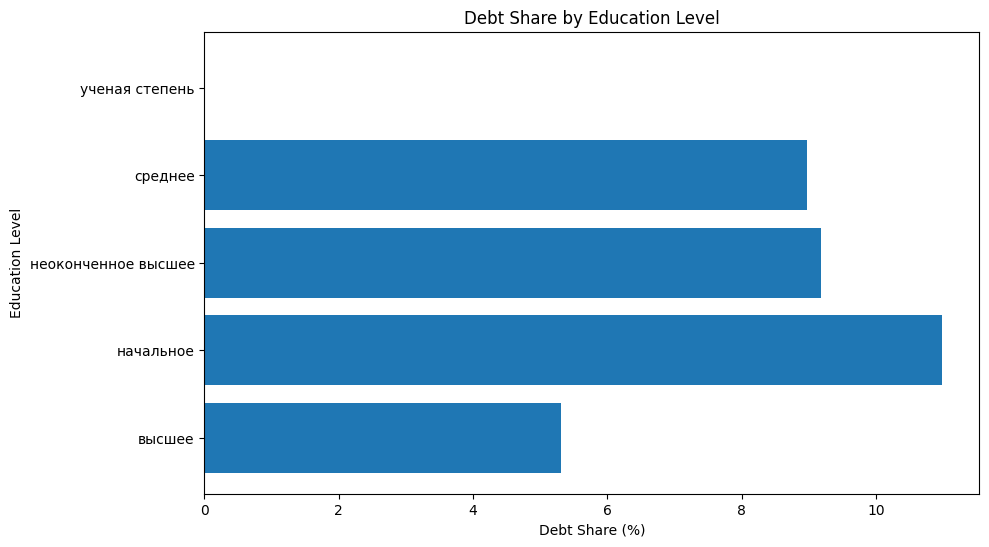

In [46]:
# Creating a horizontal bar chart for debt share by education level
plt.figure(figsize=(10, 6))
plt.barh(debt_share_by_education['Education Level'], debt_share_by_education['Debt Share (%)'])
plt.xlabel('Debt Share (%)')
plt.ylabel('Education Level')
plt.title('Debt Share by Education Level')
plt.show()

**Conclusion:** By examining the debt share across different education levels,income and loan repayment we can determine that there is a relationship between education level and loan repayment as the result shows those with no education have the highest debt share compared to those with middle or higher education.

**Recommendation:** If there is a correlation between education level, income, and loan repayment, the customer can use this information to develop targeted financial education programs or adjust lending criteria to ensure borrowers with lower education levels have appropriate financial support and resources.

**3.5. Evaluate the repayment of loans for different purposes by category.**

To analyze the repayment of loans for different purposes, we can calculate the debt share for each purpose category.

In [42]:
debt_share_by_purpose = data.groupby('purpose_category')['debt'].mean().reset_index()
debt_share_by_purpose['debt'] = debt_share_by_purpose['debt'] * 100
debt_share_by_purpose.columns = ['Purpose Category', 'Debt Share (%)']
print(debt_share_by_purpose)

           Purpose Category  Debt Share (%)
0            car operations        9.347319
1      getting an education        9.229615
2         holding a wedding        7.908384
3  real estate transactions        7.239651


**Conclusion:** By examining the debt share for different purpose categories, we can evaluate the repayment of loans and identify any patterns or trends. Citizens who take out loans for education and car transactions are more at risk of becoming debtors. These two categories have the same percentage of debtors (9.3%). Citizens who take out a loan for real estate transactions take a more responsible approach to repaying it.

**Recommendation:** If there are significant differences in the debt share among different purpose categories, the customer can consider the purpose of the loan as a factor in assessing loan repayment risk. They can use this information to refine their risk assessment models or develop specific loan products tailored to different purposes.

**3.6. Describe the main reasons that could lead to data omissions and anomalies. Make recommendations for the customer on future data collection (what you need to pay attention to, where data is collected incorrectly).**

Data omissions and anomalies can occur due to various reasons, including human error during data entry, missing data points, or inconsistencies in data collection processes. Some common reasons could include:

* Incomplete data entry: Ensure that all required fields are filled out completely during data collection to avoid missing data points.
* Incorrect data entry: Implement data validation checks during data entry to minimize errors and inconsistencies.
* Inconsistent data collection methods: Standardize data collection methods and ensure consistency across all data sources to maintain data integrity.
* Lack of quality control: Implement quality control measures to identify and rectify any data anomalies or inconsistencies.

**Recommendations for future data collection:**

* Clearly define and document data collection processes and guidelines to ensure consistency and accuracy.
* Implement data validation checks and error handling mechanisms during data entry to minimize errors.
* Conduct regular data quality checks and audits to identify and rectify any anomalies or inconsistencies.
* Provide training and clear instructions todata collectors to ensure proper data collection procedures.
* Implement automated data validation and cleaning processes to identify and address data anomalies in real-time.
* Regularly review and update data collection procedures to adapt to changing requirements or data needs.

# **Step 4. Write the general conclusion**

Based on the analysis conducted on the dataset, we gathered valuable insights into the factors affecting loan repayment and provided the following general conclusions:
The dataset includes information on various factors, such as marital status, education level, purpose of the loan, and income. Data preprocessing and cleaning were performed to ensure the accuracy and quality of the data.
During the analysis, we answered several key questions related to loan repayment, such as the relationship between marital status and repayment, education level and repayment, and education level and income. We also evaluated loan repayments for different purposes.

Based on our findings, we have identified several important insights.

1.	Marital status and loan repayment: A correlation appears between marital status and loan repayments. Further analysis revealed that single borrowers have a higher debt share than married borrowers. This finding suggests that marital status can be considered a factor in assessing loan repayment risk.
2.	Education level and loan repayment: We found a relationship between education level and loan repayment. Borrowers with lower educational levels have a higher debt share than those with higher educational levels. This implies that education level plays a role in loan repayment risk assessment.
3.	Education level, income, and loan repayments: There is a correlation between education level, income, and loan repayments. Higher education levels tend to be associated with higher incomes, which, in turn, may contribute to better loan repayment rates.
4.	Purpose of the loan and repayment: We analyzed the repayment of loans for different purposes and identified variations in debt share across different purpose categories. This finding suggests that the purpose of a loan can be a significant factor in assessing its repayment risk.

Based on these insights, we provide the following recommendations to the customer to:

1.	Consider incorporating marital status as a factor in loan repayment risk assessment. Adjust risk assessment models or lending criteria to account for the higher debt share among single borrowers.
2.	Develop targeted financial education programs or support for borrowers with lower educational levels. These programs can provide resources and guidance to improve financial literacy and increase the chances of loan repayment.
3.	Consider the purpose of the loan when assessing loan repayment risk. Tailor loan products or the development of specific loan repayment support programs based on the purpose of the loan to mitigate risk.
4.	Use income as an additional factor in the loan repayment risk assessment. Higher incomes may indicate a lower risk of default, so we consider adjusting the lending criteria or offering more favorable credit conditions for borrowers with higher incomes.
5.	Explore marketing strategies and offers targeted at specific customer categories. For example, consider developing loan products with more favorable credit conditions for borrowers without children, as they may present a lower risk of default.

By implementing these recommendations, customers can improve their loan repayment rates, reduce the risk of default, and make informed decisions when providing loans to different categories of customers.
